<a href="https://colab.research.google.com/github/lukmanbayhaqi/testcpns/blob/master/cpns_logReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [102]:
dataFrame = pd.read_csv("testcpns.csv")

In [103]:
dataFrame.describe()

,toefl,ipk,pengalaman_kerja,diterima
count,9.000000,9.000000,9.000000,9.000000
mean,721.111111,3.048889,3.888889,0.666667
std,32.574700,0.493468,1.452966,0.500000
min,680.000000,2.030000,1.000000,0.000000
25%,690.000000,3.030000,3.000000,0.000000
50%,720.000000,3.070000,4.000000,1.000000
75%,740.000000,3.090000,5.000000,1.000000
max,780.000000,4.000000,6.000000,1.000000


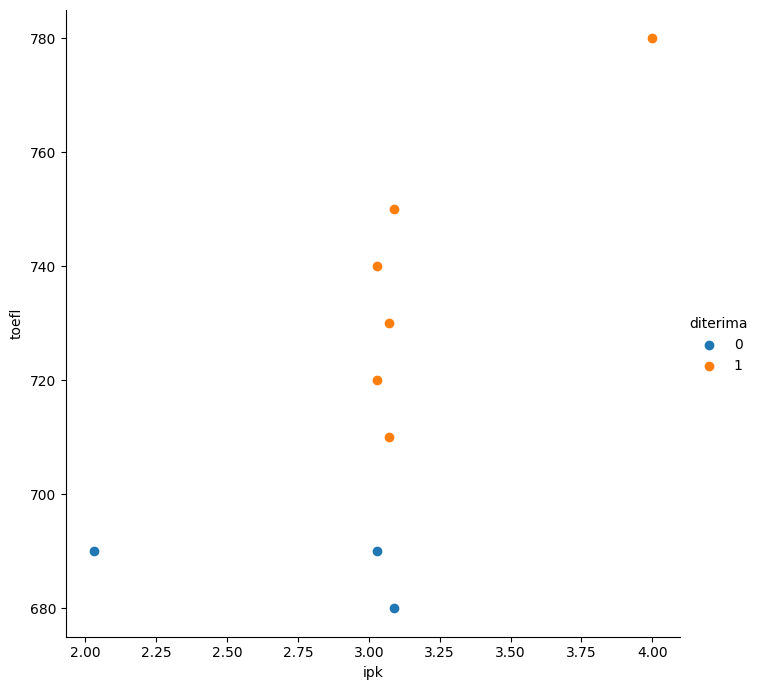

In [104]:
sns.FacetGrid(dataFrame, hue="diterima", height=7).map(plt.scatter, "ipk", "toefl").add_legend()

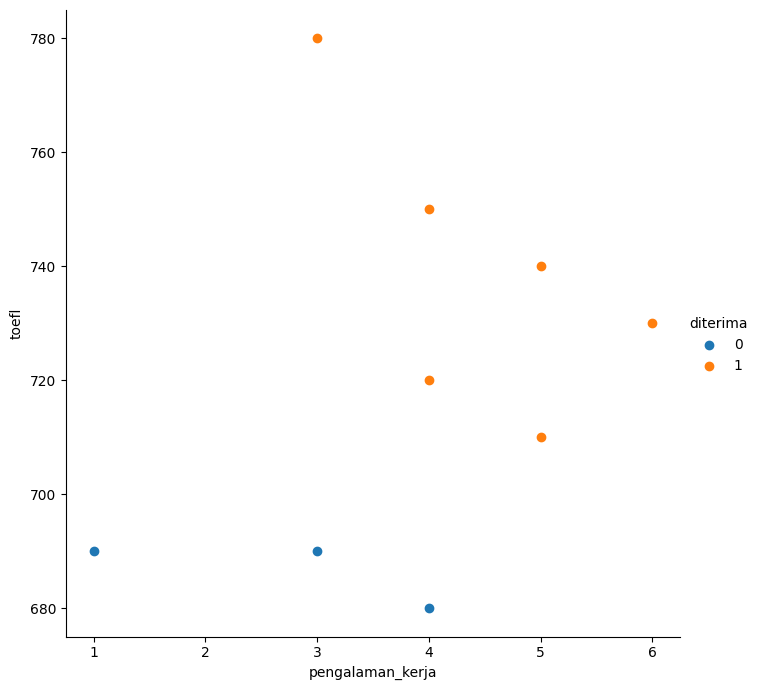

In [105]:
sns.FacetGrid(dataFrame, hue="diterima", height=7).map(plt.scatter, "pengalaman_kerja", "toefl").add_legend()

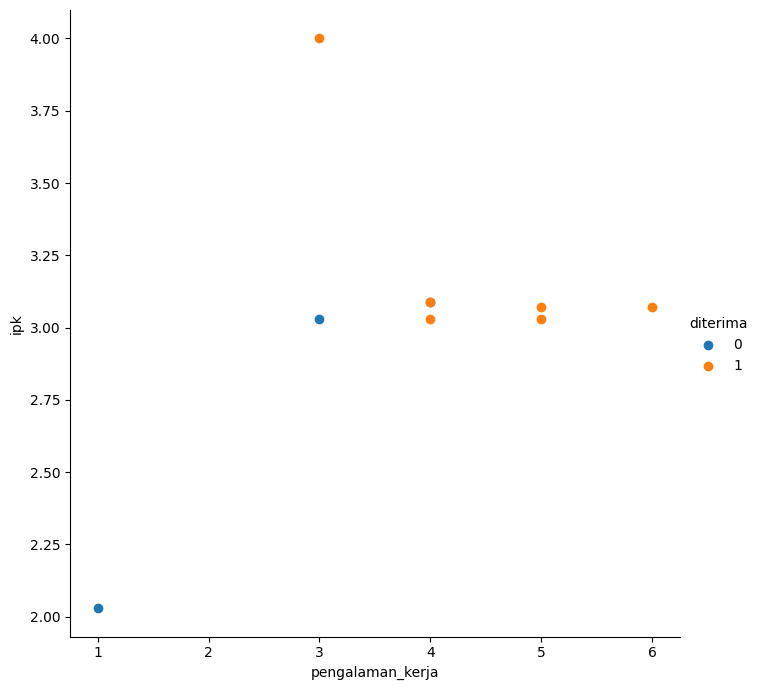

In [106]:
sns.FacetGrid(dataFrame, hue="diterima", height=7).map(plt.scatter, "pengalaman_kerja", "ipk").add_legend()

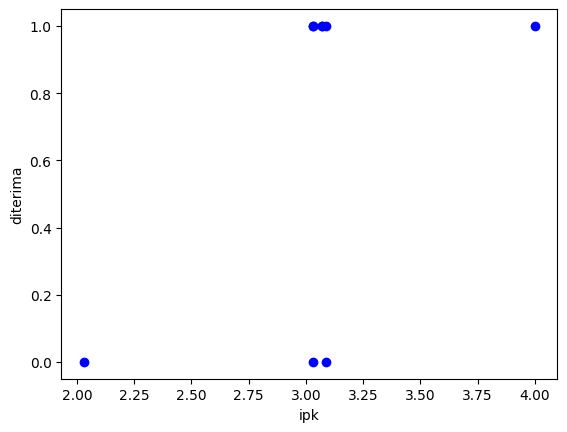

In [107]:
plt.xlabel("ipk")
plt.ylabel("diterima")

pltX = dataFrame.loc[:, "ipk"]
pltY = dataFrame.loc[:, "diterima"]
plt.scatter(pltX, pltY, color="blue", label="ipk")

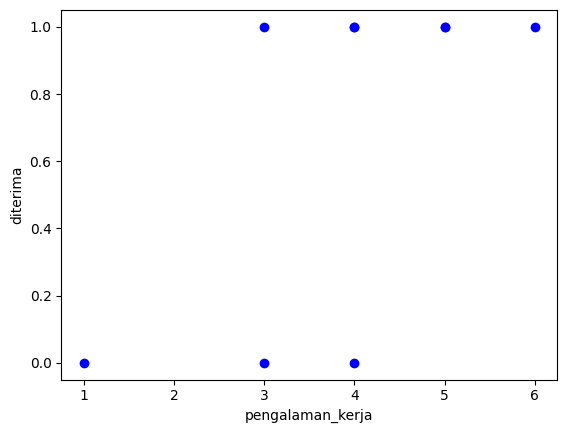

In [108]:
plt.xlabel("pengalaman_kerja")
plt.ylabel("diterima")

pltX = dataFrame.loc[:, "pengalaman_kerja"]
pltY = dataFrame.loc[:, "diterima"]
plt.scatter(pltX, pltY, color="blue", label="pengalaman_kerja")

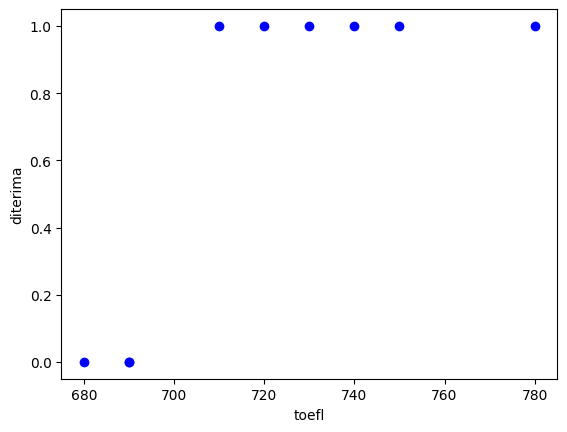

In [109]:
plt.xlabel("toefl")
plt.ylabel("diterima")

pltX = dataFrame.loc[:, "toefl"]
pltY = dataFrame.loc[:, "diterima"]
plt.scatter(pltX, pltY, color="blue", label="toefl")

In [110]:
x = dataFrame.iloc[:, :-1]
y = dataFrame.iloc[:, -1]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [112]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [113]:
y_pred = model.predict(X_test)

In [114]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1, 0],
       [0, 2]])

Text(0.5, 427.9555555555555, 'Predicted label')

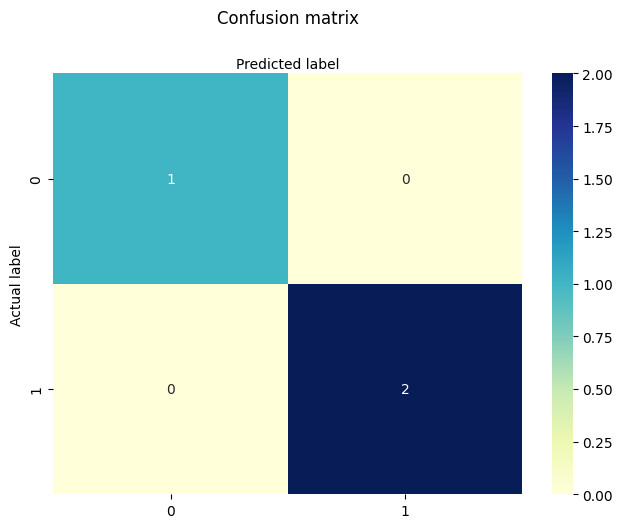

In [115]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y = 1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")